In [1]:
#as always, let's start by loading some required python modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import pandas as pd

# Loading the dataset into the repository
Total_data=pd.read_csv("../project_data/Bio165_InfluenzaAIGG_Assay.csv")

In [3]:
# Now, we isolate the data for 2 other Influenza strains for analysis:

Total_data3=pd.read_csv("../project_data/TotalLuminexData.csv")

Total_data4=Total_data3[Total_data3['antibody'] == 'B/Colorado/06/2017/B/Victoria/2019']
Total_data5 = Total_data4[Total_data4['IgType'] == 'IgG']
transformed_CO_all_Strain_data =Total_data5[Total_data5['dilution']==10]

display(transformed_CO_all_Strain_data)

,Unnamed: 0,antibody,Species,sti,day,donor,IgType,dilution,Ctrl,Vax,IFNB,Vax_IFNB
1178,1179,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,3,donor_43,IgG,10,8.634811,6.276124,6.483816,8.533330
1182,1183,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,3,donor_44,IgG,10,3.087463,0.000000,1.807355,6.199672
1186,1187,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,3,donor_46,IgG,10,4.285402,6.982994,5.870365,7.797662
1190,1191,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,3,donor_54,IgG,10,8.967226,8.167418,8.445015,8.779719
1194,1195,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,7,donor_43,IgG,10,8.172428,10.418380,9.365229,12.995855
1198,1199,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,7,donor_44,IgG,10,2.700440,2.906891,7.764872,12.839105
1202,1203,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,7,donor_46,IgG,10,4.882643,12.478138,10.203960,14.254549
1206,1207,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,7,donor_54,IgG,10,9.318543,12.329516,11.832692,12.369734
1210,1211,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,10,donor_43,IgG,10,7.459432,10.699572,8.977280,12.632654
1214,1215,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,10,donor_44,IgG,10,2.169925,4.129283,7.164907,12.969656


In [4]:
# Untransforming Data:
CO_all_Strain_data = transformed_CO_all_Strain_data.copy()
CO_all_Strain_data['Ctrl'] = 2**(transformed_CO_all_Strain_data['Ctrl'])  
CO_all_Strain_data['Vax'] = 2**(transformed_CO_all_Strain_data['Vax'])
CO_all_Strain_data['IFNB'] = 2**(transformed_CO_all_Strain_data['IFNB'])
CO_all_Strain_data['Vax_IFNB'] = 2**(transformed_CO_all_Strain_data['Vax_IFNB'])

display(CO_all_Strain_data)

,Unnamed: 0,antibody,Species,sti,day,donor,IgType,dilution,Ctrl,Vax,IFNB,Vax_IFNB
1178,1179,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,3,donor_43,IgG,10,397.5,77.500000,89.500000,370.500000
1182,1183,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,3,donor_44,IgG,10,8.5,1.000000,3.500000,73.500000
1186,1187,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,3,donor_46,IgG,10,19.5,126.500000,58.500000,222.500000
1190,1191,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,3,donor_54,IgG,10,500.5,287.500000,348.500000,439.500000
1194,1195,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,7,donor_43,IgG,10,288.5,1368.500001,659.500000,8168.499989
1198,1199,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,7,donor_44,IgG,10,6.5,7.500000,217.500000,7327.500012
1202,1203,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,7,donor_46,IgG,10,29.5,5705.500012,1179.499997,19545.499990
1206,1207,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,7,donor_54,IgG,10,638.5,5147.000010,3647.499993,5292.500004
1210,1211,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,10,donor_43,IgG,10,176.0,1662.999996,504.000000,6350.500000
1214,1215,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,10,donor_44,IgG,10,4.5,17.500000,143.500000,8021.500017


In [5]:
# Now, we seperate on basis of LAIV vs. IIV:

CO_LAIV_data = CO_all_Strain_data[CO_all_Strain_data['sti'] == 'LAIV']
CO_IIV_data = CO_all_Strain_data[CO_all_Strain_data['sti'] == 'IIV']

In [6]:
# Now, we repeat the plotting process:
mean_Total_data2 = CO_all_Strain_data.groupby(["sti","day"], as_index=False).agg({"Ctrl": ['mean', 'sem'],"Vax": ['mean', 'sem'],"IFNB": ['mean', 'sem'], "Vax_IFNB": ['mean', 'sem']})

# Rename the columns
mean_Total_data2.columns = ['_'.join(col).strip() for col in mean_Total_data2.columns.values]

# Display the result
display(mean_Total_data2)

,sti_,day_,Ctrl_mean,Ctrl_sem,Vax_mean,Vax_sem,IFNB_mean,IFNB_sem,Vax_IFNB_mean,Vax_IFNB_sem
0,IIV,3,231.500000,127.341405,123.125000,60.571368,125.000000,76.592537,276.500000,81.409459
1,IIV,7,240.750000,147.191698,3057.125006,1400.390862,1425.999998,766.149407,10083.499999,3211.254762
2,IIV,10,177.625000,108.292885,3850.499994,2129.729177,1276.124997,702.198521,10694.500017,4376.316859
3,LAIV,3,87.833333,72.664373,691.166667,306.920910,226.500000,182.408881,1355.166665,704.724609
4,LAIV,7,96.333333,72.947660,13799.166637,5640.406546,797.333333,669.591562,12751.833309,3416.697143
5,LAIV,10,66.000000,46.120314,14911.166661,6299.531482,751.499999,647.004121,12010.000011,2963.164372


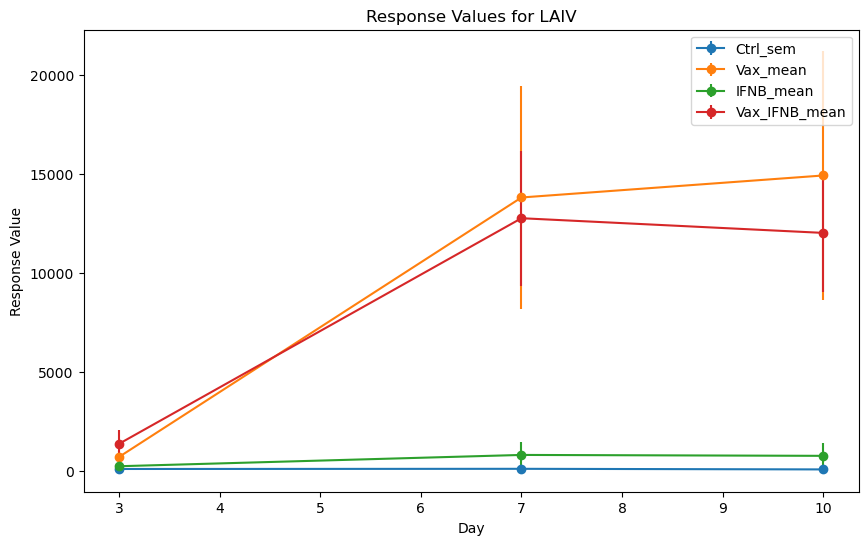

In [7]:
# Filter data for LAIV and IIV separately
CO_laiv_data = mean_Total_data2[mean_Total_data2['sti_'] == 'LAIV']
CO_iiv_data = mean_Total_data2[mean_Total_data2['sti_'] == 'IIV']

# Plot for LAIV
plt.figure(figsize=(10, 6))

plt.errorbar(CO_laiv_data['day_'], CO_laiv_data["Ctrl_mean"], yerr=CO_laiv_data["Ctrl_mean"], label="Ctrl_sem", marker="o")
plt.errorbar(CO_laiv_data['day_'], CO_laiv_data["Vax_mean"],yerr=CO_laiv_data["Vax_sem"], label="Vax_mean", marker="o")
plt.errorbar(CO_laiv_data['day_'], CO_laiv_data["IFNB_mean"], yerr=CO_laiv_data["IFNB_sem"],label="IFNB_mean", marker="o")
plt.errorbar(CO_laiv_data['day_'], CO_laiv_data["Vax_IFNB_mean"], yerr=CO_laiv_data["Vax_IFNB_sem"],label="Vax_IFNB_mean", marker="o")
    
plt.xlabel('Day')
plt.ylabel('Response Value')
plt.title('Response Values for LAIV')
plt.legend()
plt.show()

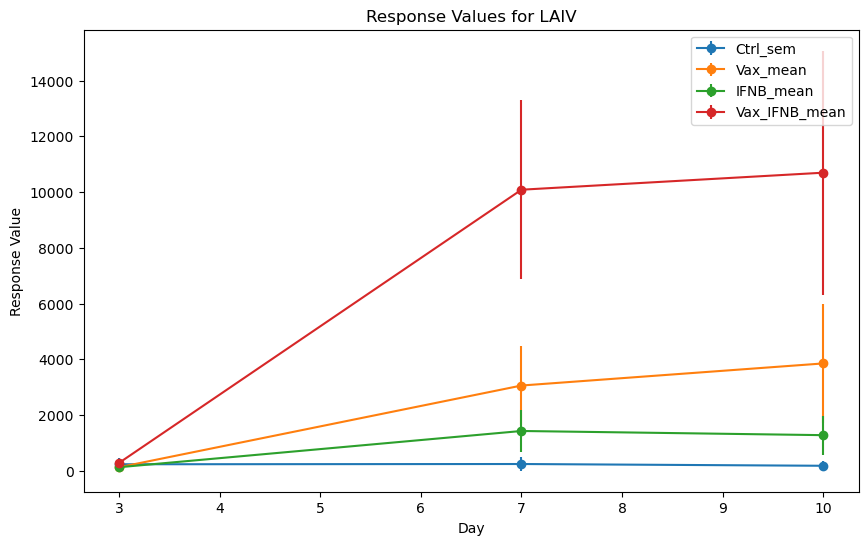

In [8]:
# Plot for LAIV
plt.figure(figsize=(10, 6))

plt.errorbar(CO_iiv_data['day_'], CO_iiv_data["Ctrl_mean"], yerr=CO_iiv_data["Ctrl_mean"], label="Ctrl_sem", marker="o")
plt.errorbar(CO_iiv_data['day_'], CO_iiv_data["Vax_mean"],yerr=CO_iiv_data["Vax_sem"], label="Vax_mean", marker="o")
plt.errorbar(CO_iiv_data['day_'], CO_iiv_data["IFNB_mean"], yerr=CO_iiv_data["IFNB_sem"],label="IFNB_mean", marker="o")
plt.errorbar(CO_iiv_data['day_'], CO_iiv_data["Vax_IFNB_mean"], yerr=CO_iiv_data["Vax_IFNB_sem"],label="Vax_IFNB_mean", marker="o")
    
plt.xlabel('Day')
plt.ylabel('Response Value')
plt.title('Response Values for LAIV')
plt.legend()
plt.show()